In [13]:
%matplotlib inline

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [14]:
START = pd.to_datetime(dt.datetime(2000, 1, 1))
END = pd.to_datetime(dt.datetime(2022, 3, 31))

def filter_data(df):
    result = df.copy()
    result["Date"] = pd.Series([pd.to_datetime(dt.datetime(r.Year, r.Month, r.Day)) for r in result.itertuples()])
    return result[(result["Date"] >= START) & (result["Date"] <= END)]

mel_df = pd.read_excel("../data/BOM_VIC_20220414.xlsx", sheet_name="Melbourne", usecols="B:E")
mel_df = filter_data(mel_df)

bdl_df = pd.read_excel("../data/BOM_VIC_20220414.xlsx", sheet_name="Bairnsdale", usecols="B:E")
bdl_df = filter_data(bdl_df)

hgp_df = pd.read_excel("../data/BOM_VIC_20220414.xlsx", sheet_name="Halls Gap", usecols="B:E")
hgp_df = filter_data(hgp_df)

rgn_df = pd.read_excel("../data/BOM_VIC_20220414.xlsx", sheet_name="Rutherglen", usecols="B:E")
rgn_df = filter_data(rgn_df)

bne_df = pd.read_excel("../data/BOM_Non_VIC_20220414.xlsx", sheet_name="Brisbane", usecols="B:E")
bne_df = filter_data(bne_df)

syd_df = pd.read_excel("../data/BOM_Non_VIC_20220414.xlsx", sheet_name="Sydney", usecols="B:E")
syd_df = filter_data(syd_df)

In [36]:
def sum_monthly_rainfall(df):
    agg = df[['Year','Month','Rainfall']].groupby([df['Year'], df['Month']]).agg({'Year': 'first', 'Month': 'first', 'Rainfall': 'sum'})
    dates = pd.Series([pd.to_datetime(dt.datetime(a.Year, a.Month, 1)) for a in agg.itertuples()])
    return pd.DataFrame({
        "Dates": dates,
        "Rainfall": agg["Rainfall"].values
    })
    
mel_rain = sum_monthly_rainfall(mel_df)
bdl_rain = sum_monthly_rainfall(bdl_df)
hgp_rain = sum_monthly_rainfall(hgp_df)
rgn_rain = sum_monthly_rainfall(rgn_df)
bne_rain = sum_monthly_rainfall(bne_df)
syd_rain = sum_monthly_rainfall(syd_df)

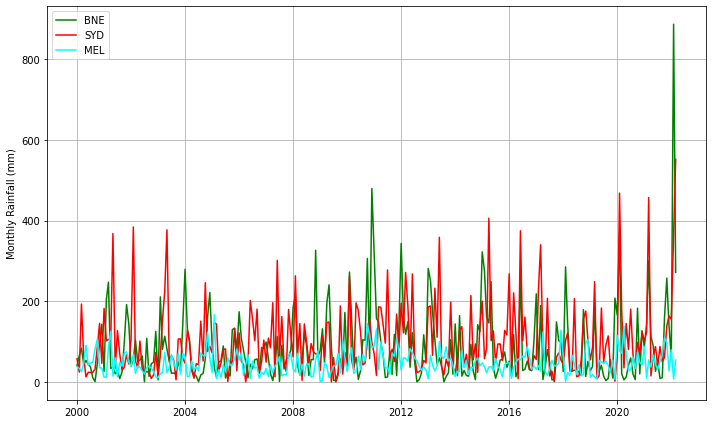

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(bne_rain["Dates"], bne_rain["Rainfall"], label = "BNE", color="green")
ax.plot(syd_rain["Dates"], syd_rain["Rainfall"], label = "SYD", color="red")
ax.plot(mel_rain["Dates"], mel_rain["Rainfall"], label = "MEL", color="cyan")
ax.set(ylabel="Monthly Rainfall (mm)")
ax.set_title("Capital City Rainfall Comparison")
ax.grid(True)
ax.legend()
fig.tight_layout()
plt.show()


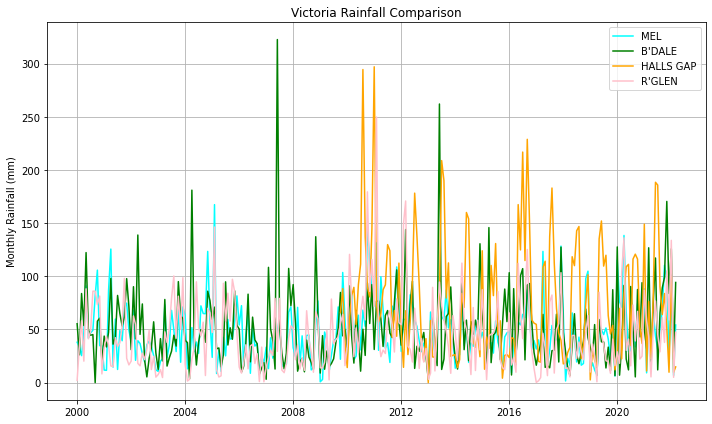

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mel_rain["Dates"], mel_rain["Rainfall"], label = "MEL", color="cyan")
ax.plot(bdl_rain["Dates"], bdl_rain["Rainfall"], label = "B'DALE", color="green")
ax.plot(hgp_rain["Dates"], hgp_rain["Rainfall"], label = "HALLS GAP", color="orange")
ax.plot(rgn_rain["Dates"], rgn_rain["Rainfall"], label = "R'GLEN", color="pink")
ax.set(ylabel="Monthly Rainfall (mm)")
ax.set_title("Victoria Rainfall Comparison")
ax.grid(True)
ax.legend()
fig.tight_layout()
plt.show()